Selected Features (with non-zero coefficients):
Bald: -1.2075
Big_Lips: -0.0118
Big_Nose: -0.2790
Black_Hair: 0.1178
Blond_Hair: 0.2082
Brown_Hair: 0.3268
Chubby: -1.8496
Double_Chin: -0.9517
Eyeglasses: -1.1667
Goatee: -0.2198
Gray_Hair: -1.4491
Heavy_Makeup: 1.4261
High_Cheekbones: 0.3334
Male: -0.1509
Mustache: -0.2108
Narrow_Eyes: -0.4120
No_Beard: -0.1926
Oval_Face: 0.5521
Pale_Skin: 0.8708
Pointy_Nose: 0.5902
Receding_Hairline: -0.8687
Rosy_Cheeks: 0.2580
Sideburns: 0.3667
Straight_Hair: 0.4279
Wavy_Hair: 0.3986
Young: 1.5629

Accuracy of QDA model: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.44      0.58     29734
           1       0.63      0.92      0.75     31046

    accuracy                           0.68     60780
   macro avg       0.74      0.68      0.66     60780
weighted avg       0.74      0.68      0.66     60780



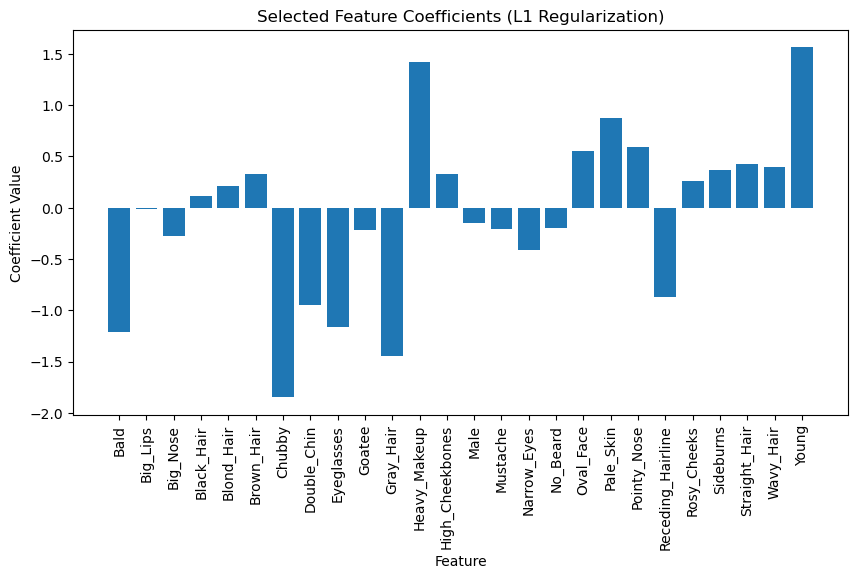

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
celeb_data = pd.read_csv('../list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)
y = celeb_data["Attractive"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply L1 feature selection using Logistic Regression
logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=1.0)
logistic.fit(X_train, y_train)

# Get coefficients
coefficients = logistic.coef_[0]

# Select features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

# Display selected features and their coefficients
print("Selected Features (with non-zero coefficients):")
for feature, coef in zip(selected_features, coefficients[coefficients != 0]):
    print(f"{feature}: {coef:.4f}")

# Use only the selected features for QDA
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_selected, y_train)

# Make predictions
y_pred = qda.predict(X_test_selected)

# Evaluate the QDA model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of QDA model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature coefficients
plt.figure(figsize=(10, 5))
plt.bar(selected_features, coefficients[coefficients != 0])
plt.xticks(rotation=90)
plt.title("Selected Feature Coefficients (L1 Regularization)")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.show()